# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data = pd.read_csv('Data_Science_PM_survey.csv', sep=';')

data.columns = ['buss_underst_diff',
                'data_acq_expl_diff',
                'modeling_diff',
                'validation_diff',
                'deployment_diff',
                'monitoring_diff',
                'manag_problems',
                'delays_freq',
                'methodology',
                'profession',
                'submission_dt',
                'token']

# Functions

In [3]:
def onehot_declutter(df, col_in:str, sep:str =',', replace:bool = True):
    """ transforms a column with multiple string values into one hot encoding columns"""
    
    string_instances = {item.strip() for i in data[col_in] for item in i.split(sep)}
    
    for string in string_instances:
        df[string.replace(' ','_')] = [1 if string in i else 0 for i in df[col_in]]
    if replace:
        df.drop(columns = col_in, inplace = True)
    return df

# Data cleaning

In [4]:
data = onehot_declutter(data,'manag_problems',sep=',')

In [5]:
data.drop(columns = ['submission_dt','token','not_data_science_project_itself._None_of_these_apply_to_me.','The_options_are_very_biased_toward_management_issues'], inplace = True)

In [6]:
data.head()

,buss_underst_diff,data_acq_expl_diff,modeling_diff,validation_diff,deployment_diff,monitoring_diff,delays_freq,methodology,profession,Late/low_engagement_of_stakeholders,Frequent_delays,Poor_communication,Ineffective_coordination_between_teams,Useless_data_entries_made_by_users,Ill-defined_problem_or_business_objectives,The_amount_of_data,Infrastructure
0,9,8,4,6,7,5,9,CRISP-DM,Data Scientist,1,1,1,0,0,0,0,0
1,7,4,6,7,4,4,7,Kanban,Data Analyst,1,1,0,0,0,1,0,0
2,8,6,4,7,9,10,8,None,Data Scientist,1,0,0,1,0,1,0,0
3,8,9,3,7,7,3,10,Kanban,Manager,1,0,0,0,0,1,0,0
4,8,10,6,4,6,4,5,Scrum,Data Scientist,0,0,0,0,0,1,0,0


# EDA

In [7]:
data.query("methodology == 'Scrum'").describe().T

,count,mean,std,min,25%,50%,75%,max
buss_underst_diff,29.0,7.000000,1.732051,2.0,6.0,7.0,8.0,10.0
data_acq_expl_diff,29.0,7.413793,2.244314,2.0,7.0,8.0,9.0,10.0
modeling_diff,29.0,5.379310,2.381683,1.0,4.0,5.0,7.0,10.0
validation_diff,29.0,6.000000,2.052873,2.0,5.0,7.0,8.0,9.0
deployment_diff,29.0,6.758621,2.473505,1.0,5.0,7.0,9.0,10.0
monitoring_diff,29.0,5.758621,1.957680,1.0,5.0,6.0,7.0,9.0
delays_freq,29.0,7.068966,1.771421,2.0,6.0,7.0,8.0,10.0
Late/low_engagement_of_stakeholders,29.0,0.586207,0.501230,0.0,0.0,1.0,1.0,1.0
Frequent_delays,29.0,0.172414,0.384426,0.0,0.0,0.0,0.0,1.0
Poor_communication,29.0,0.379310,0.493804,0.0,0.0,0.0,1.0,1.0


In [8]:
data.query("methodology == 'Kanban'").describe().T

,count,mean,std,min,25%,50%,75%,max
buss_underst_diff,28.0,5.821429,2.789578,0.0,3.00,6.0,8.00,10.0
data_acq_expl_diff,28.0,6.428571,2.026282,3.0,5.00,6.5,8.00,10.0
modeling_diff,28.0,4.892857,1.950105,1.0,4.00,5.0,6.00,9.0
validation_diff,28.0,6.535714,2.426431,1.0,5.75,7.0,8.25,10.0
deployment_diff,28.0,6.250000,2.849626,1.0,4.75,7.0,8.00,10.0
monitoring_diff,28.0,5.321429,2.776269,1.0,3.00,6.0,7.00,10.0
delays_freq,28.0,6.642857,2.163918,2.0,5.75,7.0,8.00,10.0
Late/low_engagement_of_stakeholders,28.0,0.535714,0.507875,0.0,0.00,1.0,1.00,1.0
Frequent_delays,28.0,0.178571,0.390021,0.0,0.00,0.0,0.00,1.0
Poor_communication,28.0,0.214286,0.417855,0.0,0.00,0.0,0.00,1.0


In [9]:
data.query("methodology == 'CRISP-DM'").describe().T

,count,mean,std,min,25%,50%,75%,max
buss_underst_diff,13.0,7.923077,2.782731,0.0,7.0,9.0,10.0,10.0
data_acq_expl_diff,13.0,6.461538,1.853617,3.0,6.0,7.0,8.0,9.0
modeling_diff,13.0,5.230769,1.300887,2.0,5.0,6.0,6.0,7.0
validation_diff,13.0,6.615385,1.709701,4.0,6.0,6.0,8.0,10.0
deployment_diff,13.0,6.461538,1.941451,3.0,5.0,6.0,7.0,10.0
monitoring_diff,13.0,6.692308,0.947331,5.0,6.0,7.0,7.0,8.0
delays_freq,13.0,5.615385,2.567050,0.0,5.0,6.0,6.0,10.0
Late/low_engagement_of_stakeholders,13.0,0.615385,0.506370,0.0,0.0,1.0,1.0,1.0
Frequent_delays,13.0,0.230769,0.438529,0.0,0.0,0.0,0.0,1.0
Poor_communication,13.0,0.307692,0.480384,0.0,0.0,0.0,1.0,1.0


In [10]:
data.query("methodology == 'None'").describe().T

,count,mean,std,min,25%,50%,75%,max
buss_underst_diff,11.0,6.545455,2.733629,2.0,5.0,7.0,8.5,10.0
data_acq_expl_diff,11.0,7.000000,1.483240,5.0,6.0,7.0,8.0,10.0
modeling_diff,11.0,5.818182,1.778661,3.0,5.0,6.0,7.0,8.0
validation_diff,11.0,7.181818,1.328020,6.0,6.0,7.0,7.5,10.0
deployment_diff,11.0,8.090909,1.445998,6.0,7.0,8.0,9.0,10.0
monitoring_diff,11.0,7.090909,2.022600,5.0,5.5,7.0,8.5,10.0
delays_freq,11.0,6.545455,2.018100,2.0,5.5,7.0,8.0,9.0
Late/low_engagement_of_stakeholders,11.0,0.363636,0.504525,0.0,0.0,0.0,1.0,1.0
Frequent_delays,11.0,0.181818,0.404520,0.0,0.0,0.0,0.0,1.0
Poor_communication,11.0,0.181818,0.404520,0.0,0.0,0.0,0.0,1.0


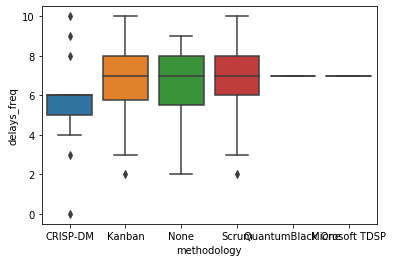

In [11]:
sns.boxplot(x="methodology", y="delays_freq", data=data)

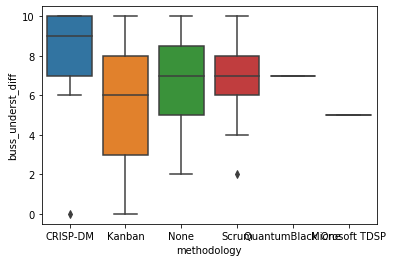

In [12]:
sns.boxplot(x="methodology", y="buss_underst_diff", data=data)

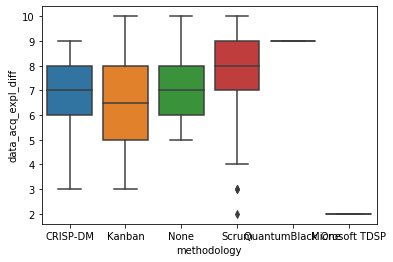

In [13]:
sns.boxplot(x="methodology", y="data_acq_expl_diff", data=data)

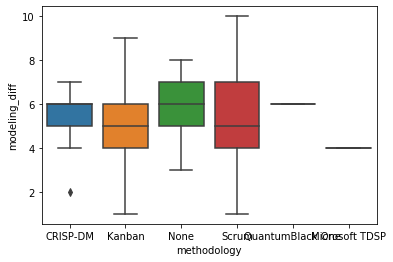

In [14]:
sns.boxplot(x="methodology", y="modeling_diff", data=data)

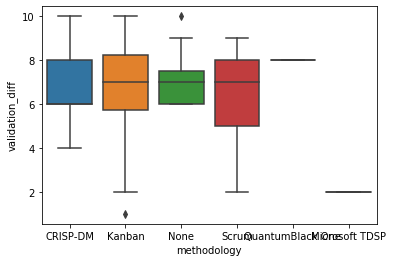

In [15]:
sns.boxplot(x="methodology", y="validation_diff", data=data)

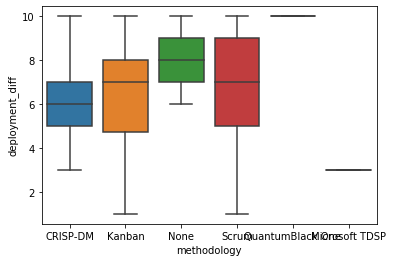

In [16]:
sns.boxplot(x="methodology", y="deployment_diff", data=data)

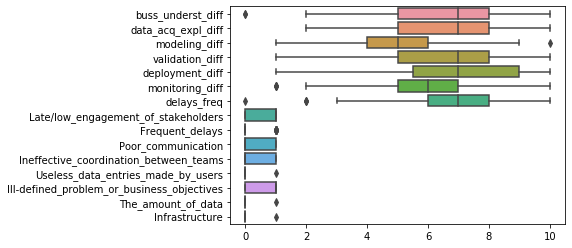

In [17]:
sns.boxplot( orient="h", data=data)

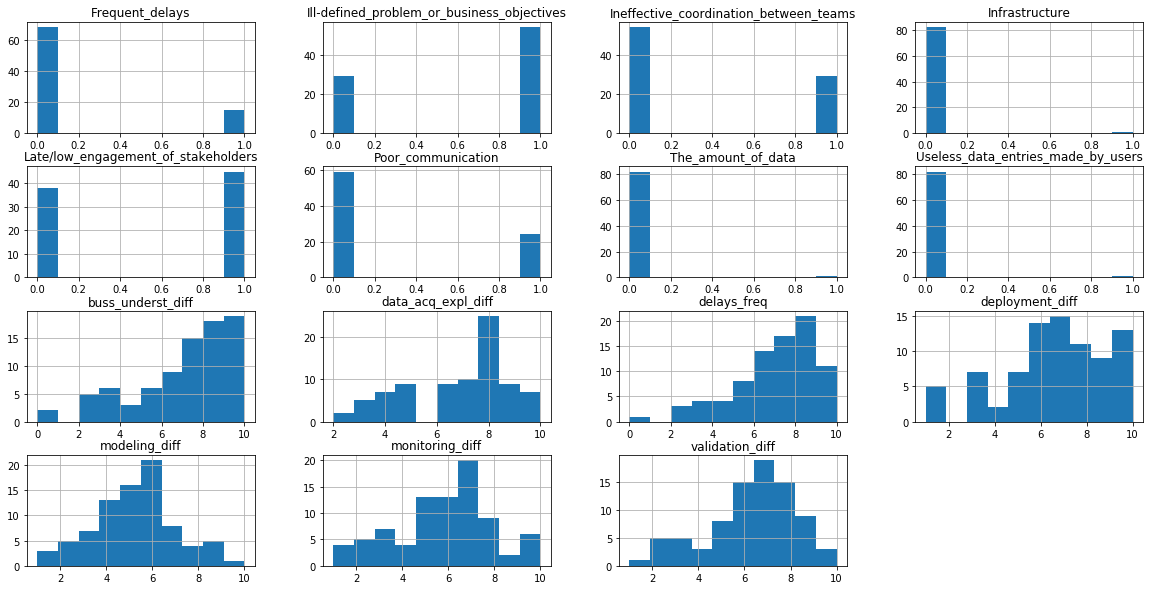

In [23]:
data.hist(figsize=(20,10));